# tinybEEr Project

## Marcus Deichman, Julia Combs, Jasmine Gill

Notebook will create, train, and compress the beer classification model that will be deployed on the tinyML device

# import necessary packages


In [68]:
# import all necessary packages 

import pandas as pd
import re
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

# for min/max scaling
from sklearn.preprocessing import MinMaxScaler

# for machine learning data prep
from sklearn.model_selection import train_test_split # used to split the data into training and test sets
from sklearn.datasets import make_blobs


# download the data

In [81]:
# read in data into dataframe
# beer_url = 'https://raw.githubusercontent.com/niklasax/Final_Project/main/data_cleaning/beer_cleaned.csv'

# visualize the data as data frame
# beer_df = pd.read_csv(beer_url)
beer_df = pd.read_csv("tinybEEr_beer_data - Sheet1.csv") # Assuming data is in same directory
# beer_df.head(20)
beer_df.describe()

,num,beer_num,abv,ibu,ph_act,ph_V,alc_gas,turb_V,ntu,Unnamed: 12,r,g,b,c
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,0.0,0.0,0.0,0.0,0.0
mean,11.279070,18.364341,3.897674,22.875969,4.975659,3.095969,513.085271,2.362171,2429.578915,NaN,NaN,NaN,NaN,NaN
std,6.273676,14.663911,2.711793,23.326825,1.496713,0.240499,72.063994,1.084102,1151.711407,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,0.000000,0.000000,1.760000,2.840000,390.000000,0.490000,-139.680000,NaN,NaN,NaN,NaN,NaN
25%,6.000000,2.000000,0.000000,0.000000,4.990000,2.990000,423.000000,1.590000,2979.260000,NaN,NaN,NaN,NaN,NaN
50%,11.000000,21.000000,5.200000,15.000000,5.180000,3.060000,557.000000,2.240000,3000.000000,NaN,NaN,NaN,NaN,NaN
75%,17.000000,31.000000,5.600000,47.000000,5.740000,3.080000,563.000000,2.710000,3000.000000,NaN,NaN,NaN,NaN,NaN
max,23.000000,41.000000,7.000000,60.000000,7.170000,5.050000,574.000000,4.240000,3003.690000,NaN,NaN,NaN,NaN,NaN


style
Stout          23
Lager          22
Ale            22
IPA            22
water          20
lemon juice    20
Name: count, dtype: int64


<Axes: xlabel='style'>

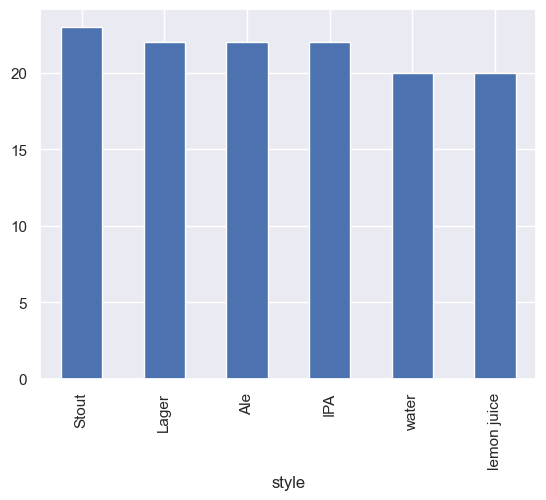

In [70]:
# unique_beer_name = beer_df.style_group.unique()
# unique_beer_name = beer_df.style.unique()
# print('Unique beer_names:', unique_beer_name)
# print('# of Unique beer_names:', len(unique_beer_name))

print(beer_df["style"].value_counts())

beer_df["style"].value_counts().plot(kind = 'bar')

In [71]:
styles = (beer_df["style"].value_counts()).keys()
print(styles)

Index(['Stout', 'Lager', 'Ale', 'IPA', 'water', 'lemon juice'], dtype='object', name='style')


In [72]:
whos

Variable             Type         Data/Info
-------------------------------------------
CompareTwoFeatures   function     <function CompareTwoFeatu<...>es at 0x000002A102E9CF70>
MinMaxScaler         type         <class 'sklearn.preproces<...>sing._data.MinMaxScaler'>
PCA                  ABCMeta      <class 'sklearn.decomposition._pca.PCA'>
X_feat               ndarray      129x6: 774 elems, type `float64`, 6192 bytes
abv_flt              Series       0      0.0\n1      0.0\n2<...>ngth: 129, dtype: float64
beer_df              DataFrame         num  beer_num beer_n<...>\n[129 rows x 17 columns]
ibu_flt              Series       0       0.0\n1       0.0\<...>ngth: 129, dtype: float64
make_blobs           function     <function make_blobs at 0x000002A1778CF940>
np                   module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pca                  PCA          PCA(n_components=2)
pd                   module       <module 'pandas' from 'c:<...>es\\pandas\\__init__.p

In [79]:
def CompareTwoFeatures(xParam, yParam):
    ''' Plots comparison of two beer features both in separate and combined plots '''
    fig, axes = plt.subplots(2, 3, sharex = True, sharey = True, figsize=(14,7)) # One beer style by figure  
    fig, global_ax = plt.subplots(figsize=(12,12)) # All beers styles in one figure.
    x_max = beer_df[xParam].max() # Get the max ibu value
    y_max = beer_df[yParam].max() # Get the max abv value

    for style, ax in zip(styles, axes.ravel()):
        xParam_data = beer_df[xParam][beer_df["style"] == style].values
        yParam_data = beer_df[yParam][beer_df["style"] == style].values
        
        ax.set_title(style)
        ax.plot(xParam_data, yParam_data, marker = 'o', linestyle = '')
        ax.legend(numpoints=1, loc='lower right', fontsize = 10)

        global_ax.plot(xParam_data, yParam_data, marker = 'o', label = style, linestyle = '')

    global_ax.legend(numpoints=1, loc='lower right', fontsize = 10)
    global_ax.set_title(xParam + " vs. " + yParam, fontsize = 16)
    

    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


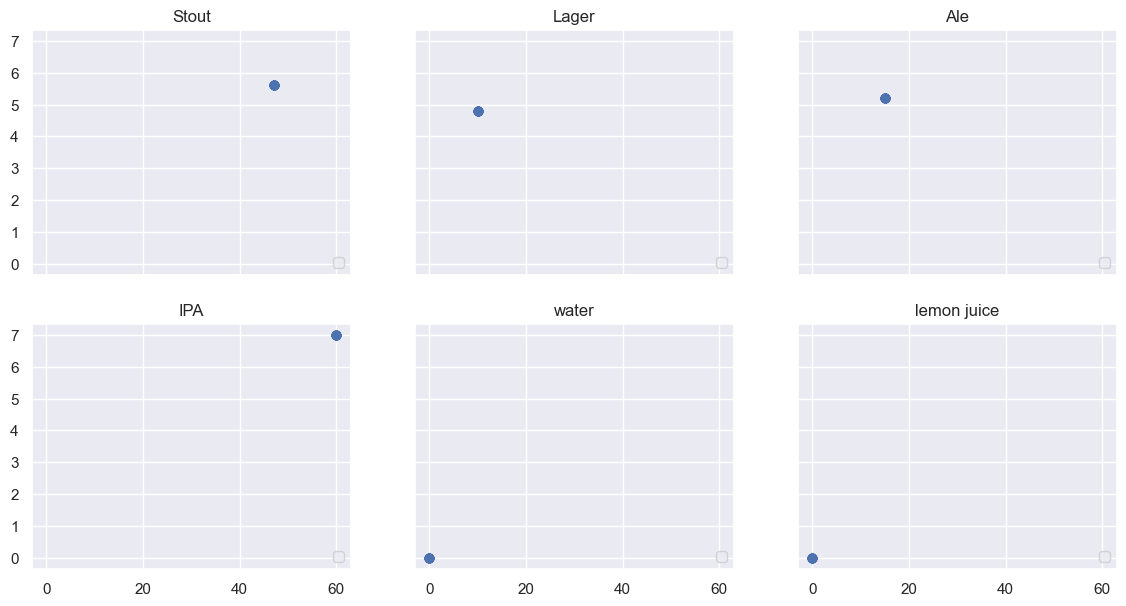

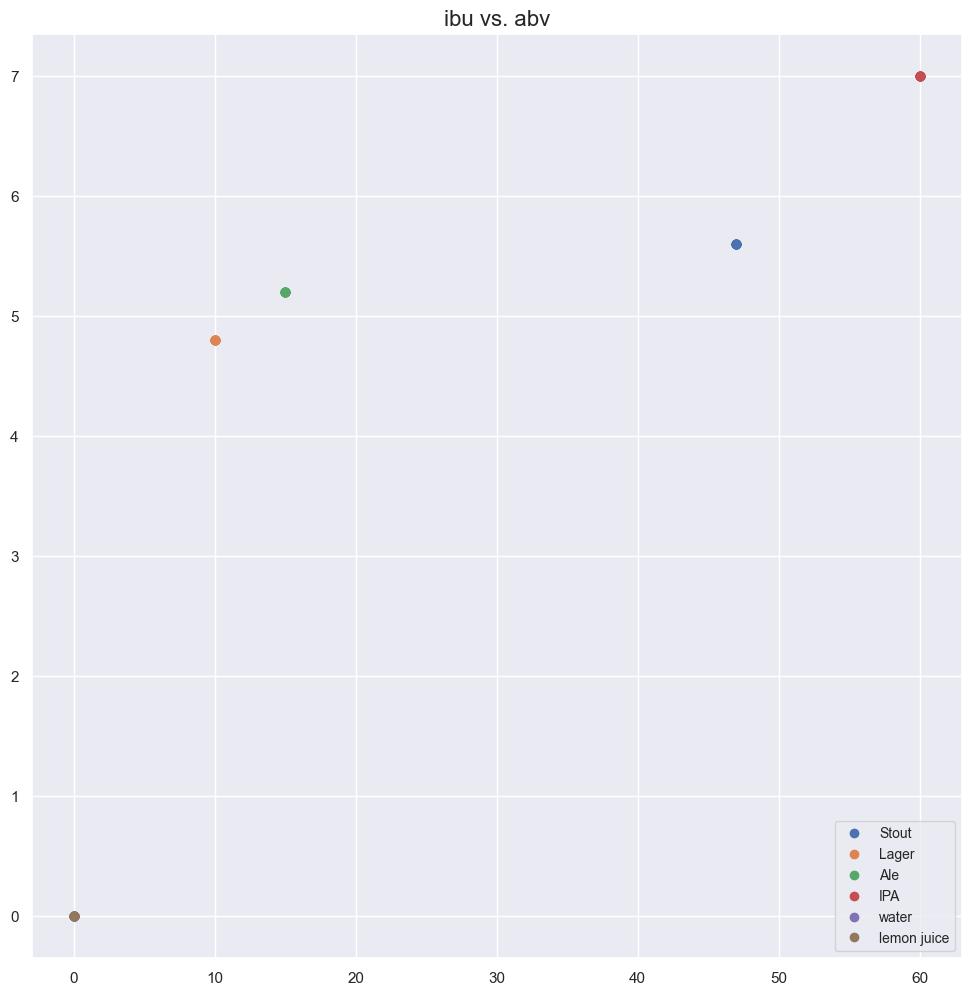

In [74]:
CompareTwoFeatures("ibu", "abv")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


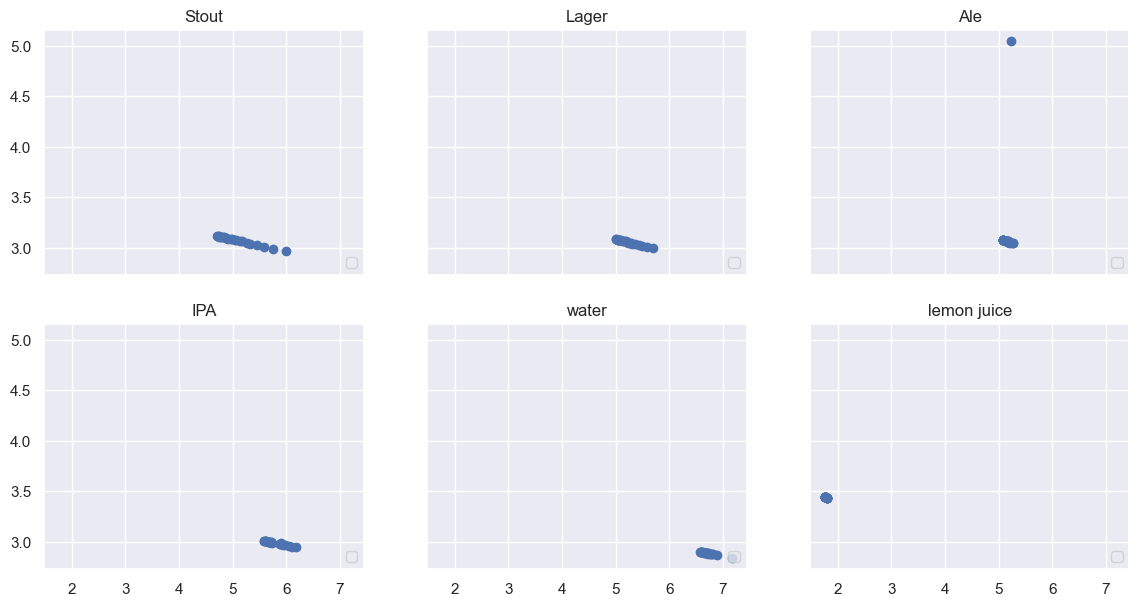

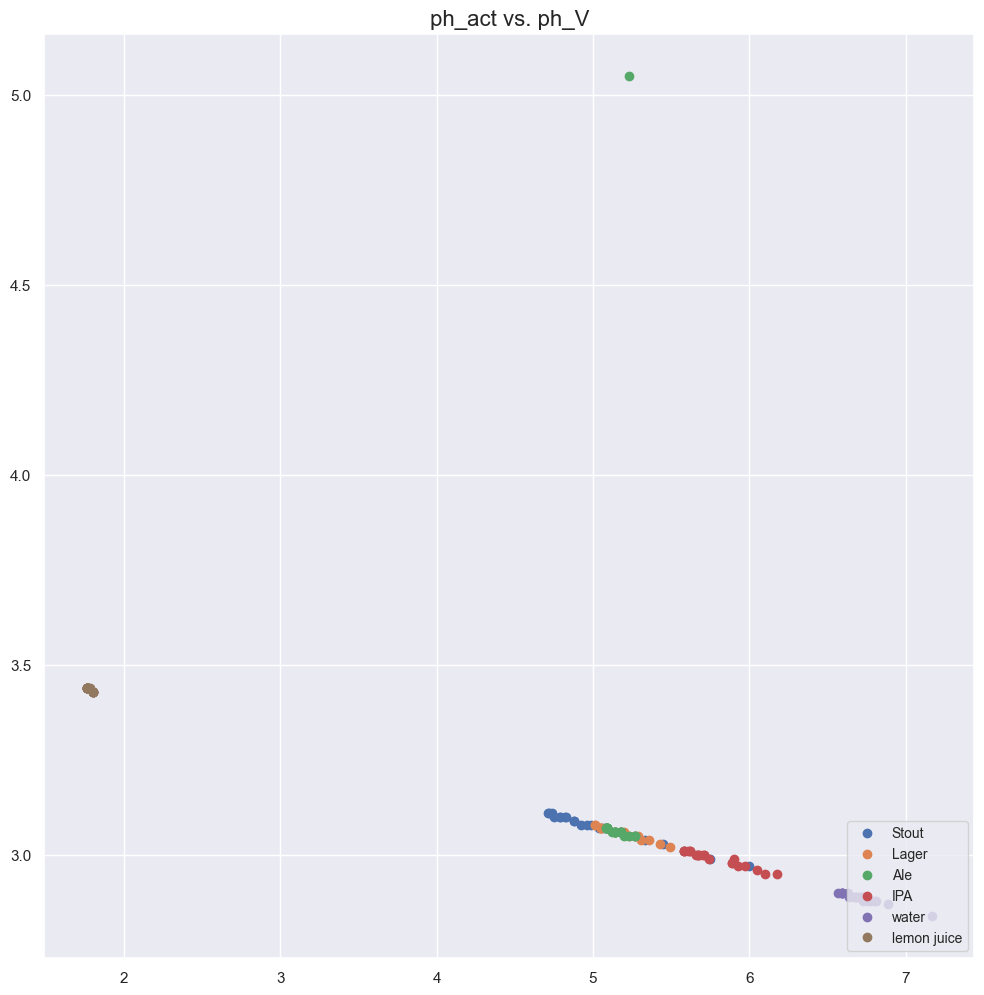

In [75]:
CompareTwoFeatures("ph_act", "ph_V")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


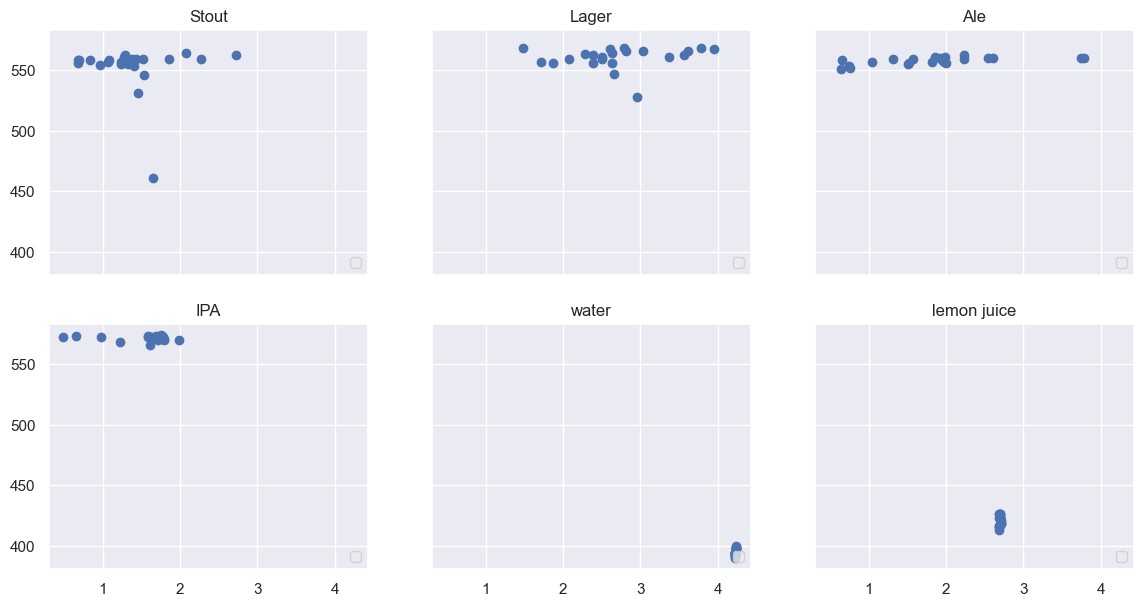

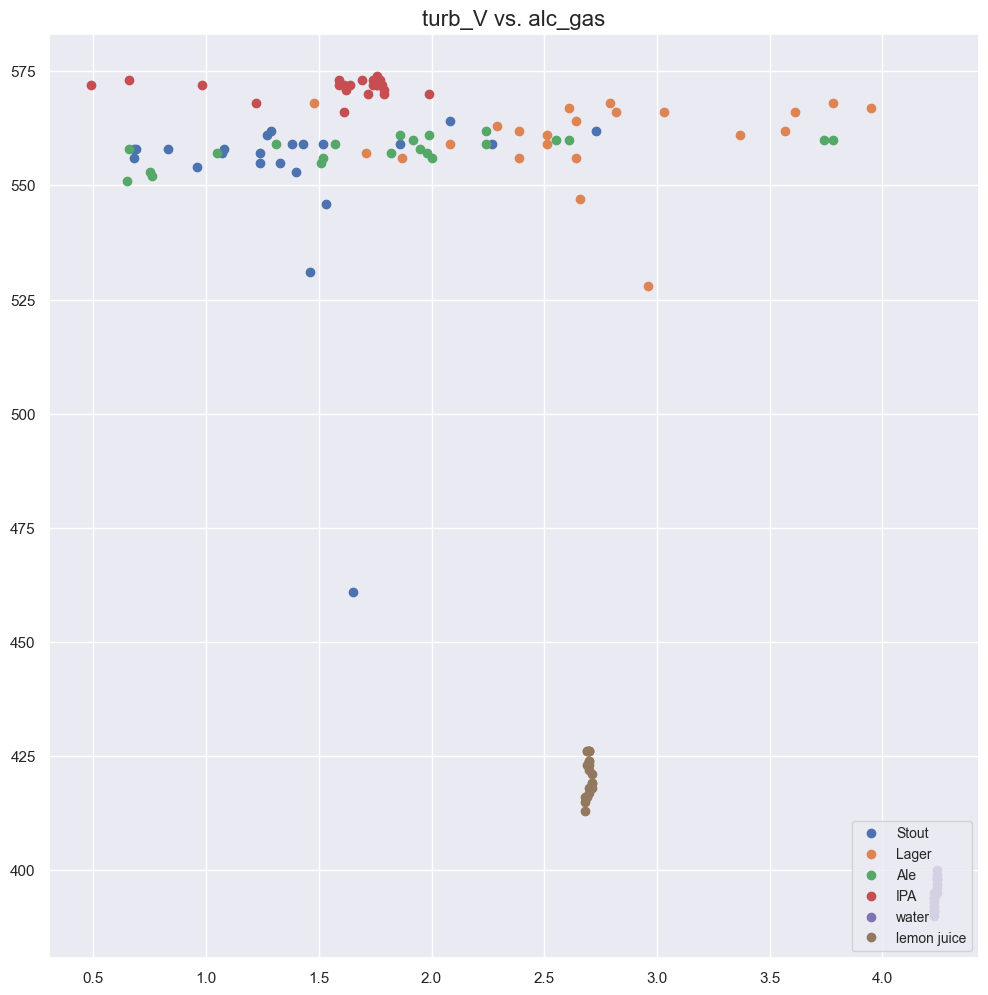

In [76]:
CompareTwoFeatures("turb_V", "alc_gas")

In [82]:
# from sklearn.manifold import TSNE

# # Project the data: this step will take several seconds
# tsne = TSNE(n_components=2, init='random', random_state=0)
# beer_proj = tsne.fit_transform(digits.data)
# print(digits_proj.shape)

from sklearn.decomposition import PCA

#Extracting features from the df_scaled dataframe
X_feat = beer_df.iloc[:, 5:11].values
print('X_feat:', X_feat)
# initialize the PCA object
pca = PCA(n_components = 2) # extracts 2 features [maintain same dimension] use 1 to reduce dimension
# transform and fit the feature of the training set
X_PCA = pca.fit_transform(X_feat)
print('X_PCA:', X_PCA)

X_feat: [[0.00e+00 0.00e+00 7.17e+00 2.84e+00 4.00e+02 4.24e+00]
 [0.00e+00 0.00e+00 6.89e+00 2.87e+00 3.99e+02 4.24e+00]
 [0.00e+00 0.00e+00 6.72e+00 2.89e+00 3.98e+02 4.24e+00]
 [0.00e+00 0.00e+00 6.68e+00 2.89e+00 3.98e+02 4.24e+00]
 [0.00e+00 0.00e+00 6.59e+00 2.90e+00 3.98e+02 4.24e+00]
 [0.00e+00 0.00e+00 6.59e+00 2.90e+00 3.98e+02 4.24e+00]
 [0.00e+00 0.00e+00 6.57e+00 2.90e+00 3.97e+02 4.24e+00]
 [0.00e+00 0.00e+00 6.59e+00 2.90e+00 3.96e+02 4.24e+00]
 [0.00e+00 0.00e+00 6.59e+00 2.90e+00 3.95e+02 4.24e+00]
 [0.00e+00 0.00e+00 6.63e+00 2.90e+00 3.95e+02 4.23e+00]
 [0.00e+00 0.00e+00 6.64e+00 2.89e+00 3.94e+02 4.23e+00]
 [0.00e+00 0.00e+00 6.67e+00 2.89e+00 3.94e+02 4.23e+00]
 [0.00e+00 0.00e+00 6.68e+00 2.89e+00 3.94e+02 4.23e+00]
 [0.00e+00 0.00e+00 6.72e+00 2.89e+00 3.93e+02 4.23e+00]
 [0.00e+00 0.00e+00 6.73e+00 2.88e+00 3.93e+02 4.23e+00]
 [0.00e+00 0.00e+00 6.77e+00 2.88e+00 3.92e+02 4.23e+00]
 [0.00e+00 0.00e+00 6.80e+00 2.88e+00 3.92e+02 4.23e+00]
 [0.00e+00 0.00e+00 6.8

0       1
1       1
2       1
3       1
4       1
       ..
124    41
125    41
126    41
127    41
128    41
Name: beer_num, Length: 129, dtype: int64


Text(0, 0.5, 'PCA dim 2')

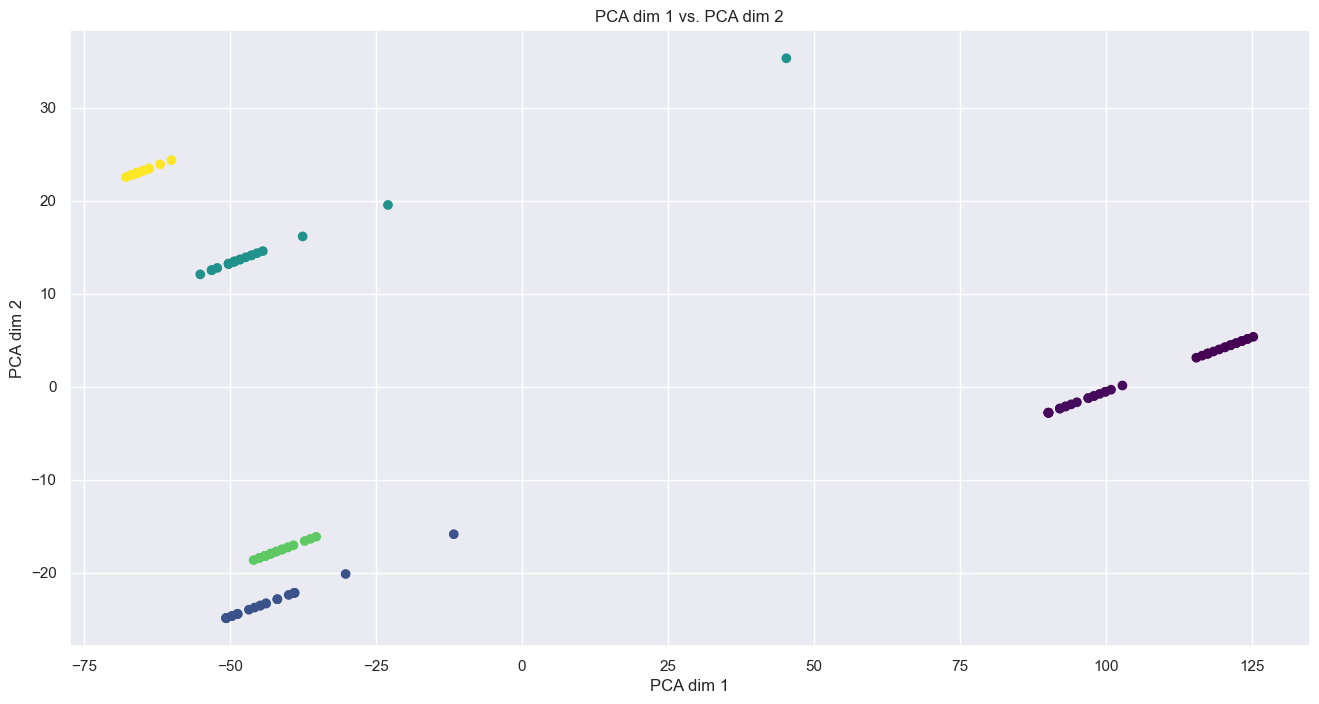

In [88]:
cmap = beer_df["beer_num"]
print(cmap)

plt.figure(figsize=(16,8))
plt.scatter(x=X_PCA[:,0], y=X_PCA[:,1], c=cmap, cmap='viridis')
plt.title('PCA dim 1 vs. PCA dim 2')
plt.xlabel('PCA dim 1')
plt.ylabel('PCA dim 2')

From the scatter plot of the raw data, and the histograms it is evident that the abv data is very collected in a very small range. In order to distinguish the data, min-max scaling will be used.

REASON: Features with higher ranging numbers contribute more to distance metrics hence the decision of the ML algorithms will be influenced more by the high magnitude features. 

In [37]:
# encode the styles list text --> numeric values
styles = list(beer_df['style'])

styleDict = beer_df['style'].to_dict()

styles_set = set(styles)
stylesList = list(styles_set)

print(stylesList)

['Ale', 'Stout', 'lemon juice', 'Lager', 'IPA', 'water']


In [ ]:
# use min-max scaling
# y = (x – min) / (max – min)

NUMSTYLES = 4

temp_flt_array = temp_flt.to_numpy()
temp_flt_reshaped = temp_flt_array.reshape(-1, 1)

temp_flt_minmax = MinMaxScaler().fit_transform(temp_flt_reshaped)

ph_flt_array = ph_flt.to_numpy()
ph_flt_reshaped = ph_flt_array.reshape(-1, 1)
ph_flt_minmax = MinMaxScaler().fit_transform(ph_flt_reshaped)

colors = []

for beer in styleDict.values():
    for i in range(NUMSTYLES):
        if beer == stylesList[i]:
            colors.append(i)

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(x=abv_flt_minmax, y=ibu_flt_minmax, c=colors, cmap='plasma')
plt.title('abv_flt_minmax vs. ibu_flt raw data')
plt.xlabel('abv_flt_minmax')
plt.ylabel('ibu_flt')
plt.legend(colors)

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(x=temp_flt_minmax, y=ph_flt_minmax, c=colors, cmap='viridis')
plt.title('temp_flt_minmax vs. ph_flt raw data')
plt.xlabel('temp_flt_minmax')
plt.ylabel('ph_flt')
plt.legend(colors)

In [ ]:
# Try  standard scaler
# from sklearn.preprocessing import StandardScaler
# StandardScaler()

In [ ]:
# Try assign colors to data points in scatter plot
# Try K means and Gaussian Mixture models 

In [ ]:
#Create a dataframe 
abv_flt_minmax_reshaped = abv_flt_minmax.reshape(1,-1)
ibu_flt_minmax_reshaped = ibu_flt_minmax.reshape(1,-1)
df_scaled = pd.DataFrame({'abv': abv_flt_minmax_reshaped[0],'ibu': ibu_flt_minmax_reshaped[0]})
df_scaled.head()

In [ ]:
from sklearn.decomposition import PCA

#Extracting features from the df_scaled dataframe
X_feat = df_scaled.iloc[:, :].values
print('X_feat:', X_feat)
# initialize the PCA object
pca = PCA(n_components = 2) # extracts 2 features [maintain same dimension] use 1 to reduce dimension
# transform and fit the feature of the training set
X_PCA = pca.fit_transform(X_feat)
print('X_PCA:', X_PCA)

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(x=X_PCA[:,0], y=X_PCA[:,1], cmap='viridis')
plt.title('PCA dim 1 vs. PCA dim 2')
plt.xlabel('PCA dim 1')
plt.ylabel('PCA dim 2')

In [ ]:
# Import the Kernel PCA class
from sklearn.decomposition import KernelPCA
# initialize the Kernel PCA object
Kernel_pca = KernelPCA(n_components = 2, kernel= "rbf") # extracts 2 features, specify the kernel as rbf, polinomial, linear, or sigmoid
# transform and fit the feature of the training set
X_KPCA = Kernel_pca.fit_transform(X_feat)

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(x=X_KPCA[:,0], y=X_KPCA[:,1], cmap='viridis')
plt.title('KPCA dim 1 vs. KPCA dim 2')
plt.xlabel('KPCA dim 1')
plt.ylabel('KPCA dim 2')